
# Decision Trees and Random Forests on Heart Disease Dataset

**Objective**: Learn tree-based models for classification and regression.

**Tools**: Scikit-learn, Graphviz

This notebook walks through the following steps:
1. Train a Decision Tree Classifier and visualize the tree.
2. Analyze overfitting and control tree depth.
3. Train a Random Forest and compare accuracy.
4. Interpret feature importances.
5. Evaluate using cross-validation.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import seaborn as sns
import graphviz
import warnings
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv("heart .csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



## 1. Understanding the Features in the Heart Disease Dataset

Each row represents a patient's record with various attributes. Here's what each column means:

- **age**: Age of the patient.
- **sex**: Gender (1 = male, 0 = female).
- **cp**: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
- **trestbps**: Resting blood pressure (in mm Hg).
- **chol**: Serum cholesterol in mg/dl.
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- **restecg**: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).
- **thalach**: Maximum heart rate achieved.
- **exang**: Exercise-induced angina (1 = yes, 0 = no).
- **oldpeak**: ST depression induced by exercise relative to rest.
- **slope**: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
- **ca**: Number of major vessels (0–3) colored by fluoroscopy.
- **thal**: 1 = normal, 2 = fixed defect, 3 = reversible defect.
- **target**: Target variable (1 = heart disease present, 0 = not present).


## Exploratory Data Analysis (EDA)

In [5]:

# Summary statistics
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dataset Info (`data.info()`)

The Heart Disease dataset contains **1,025 entries (rows)** and **14 columns (features)**. Below are the key observations:

**No Missing Values**: All columns have 1,025 non-null entries, indicating that the dataset is clean.
**Data Types**:
  - `int64`: 13 columns (e.g., `age`, `sex`, `cp`, `chol`, `thal`, etc.)
  - `float64`: 1 column (`oldpeak`)
- All features are numerical, so no text preprocessing is required.
**Target Variable**: The `target` column is binary (0 = no disease, 1 = presence of disease), making this a **binary classification** problem.

This dataset is well-suited for tree-based models like **Decision Trees** and **Random Forests**, which handle both continuous and categorical numerical inputs without requiring scaling.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Target Variable Distribution

The bar plot above illustrates the distribution of the **target variable** in the Heart Disease dataset:

- `0` indicates **absence of heart disease**
- `1` indicates **presence of heart disease**

#### Observations:
- There are approximately **499 samples labeled as 0** (no disease).
- There are approximately **526 samples labeled as 1** (disease present).
- The dataset is relatively **balanced**, with a nearly equal number of instances in both classes.

#### Why This Matters:
A balanced target distribution is advantageous for classification tasks, as it helps prevent model bias toward the majority class and supports the development of robust and generalizable models. This allows evaluation metrics such as **accuracy, precision, recall**, and **F1-score** to be more reliable.


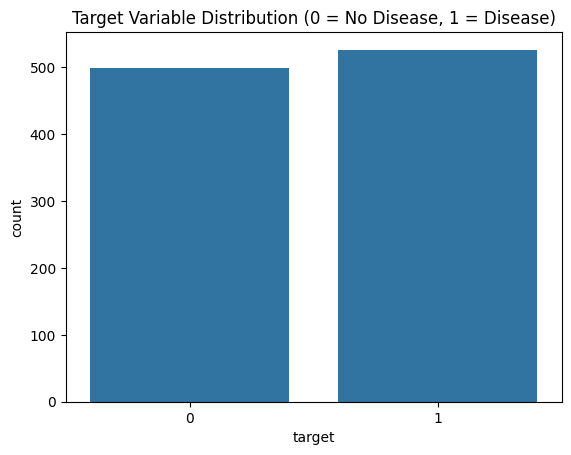

In [17]:

# Class distribution
sns.countplot(x='target', data=data)
plt.title("Target Variable Distribution (0 = No Disease, 1 = Disease)")
plt.show()


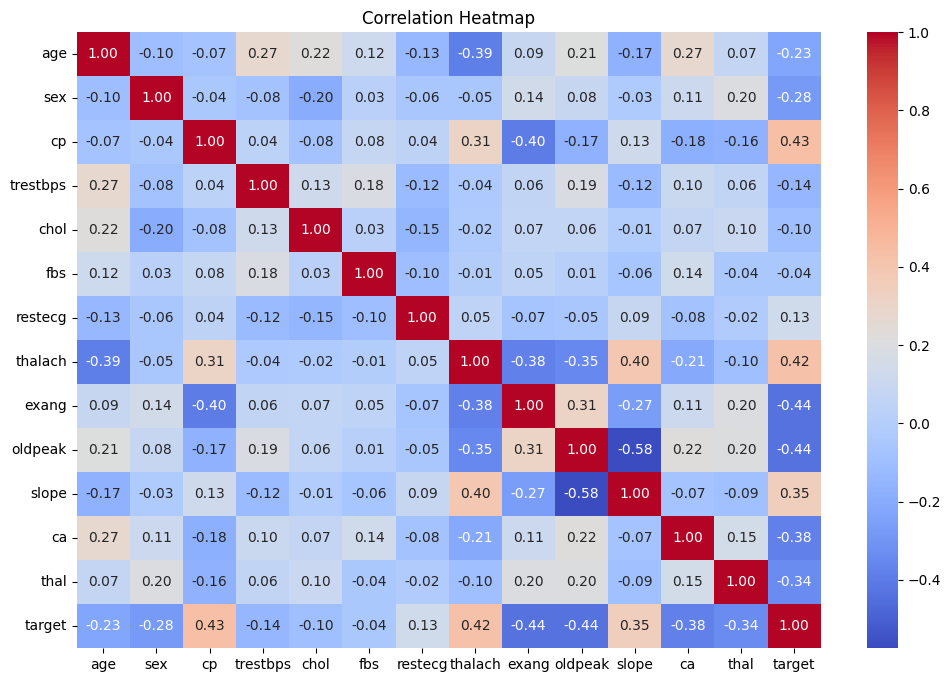

In [8]:

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Feature Distributions by Target Class

The visualizations below provide insights into how selected features vary with respect to the presence (`target = 1`) or absence (`target = 0`) of heart disease:

#### Boxplots:
- **Age vs Target**: Individuals with heart disease (`target = 1`) tend to be slightly younger on average than those without.
- **Resting Blood Pressure (`trestbps`)**: No clear difference is observed across the two target classes.
- **Serum Cholesterol (`chol`)**: There is high variability in both groups; cholesterol alone may not be a strong indicator.
- **Maximum Heart Rate Achieved (`thalach`)**: Higher values of `thalach` are generally associated with individuals having heart disease.
- **ST Depression (`oldpeak`)**: Individuals with heart disease typically show higher `oldpeak` values, indicating abnormal heart stress test results.

#### 🔹 Countplot:
- **Chest Pain Type (`cp`) vs Target**: 
  - Chest pain type 0 (typical angina) is more common in patients **without** heart disease.
  - Chest pain types 1, 2, and 3 (including atypical angina and non-anginal pain) are more frequently observed in **patients with heart disease**.

#### Conclusion:
These plots highlight key features like `thalach`, `oldpeak`, and `cp` that exhibit clear patterns across target classes. These features are likely to contribute significantly to model performance and interpretation.


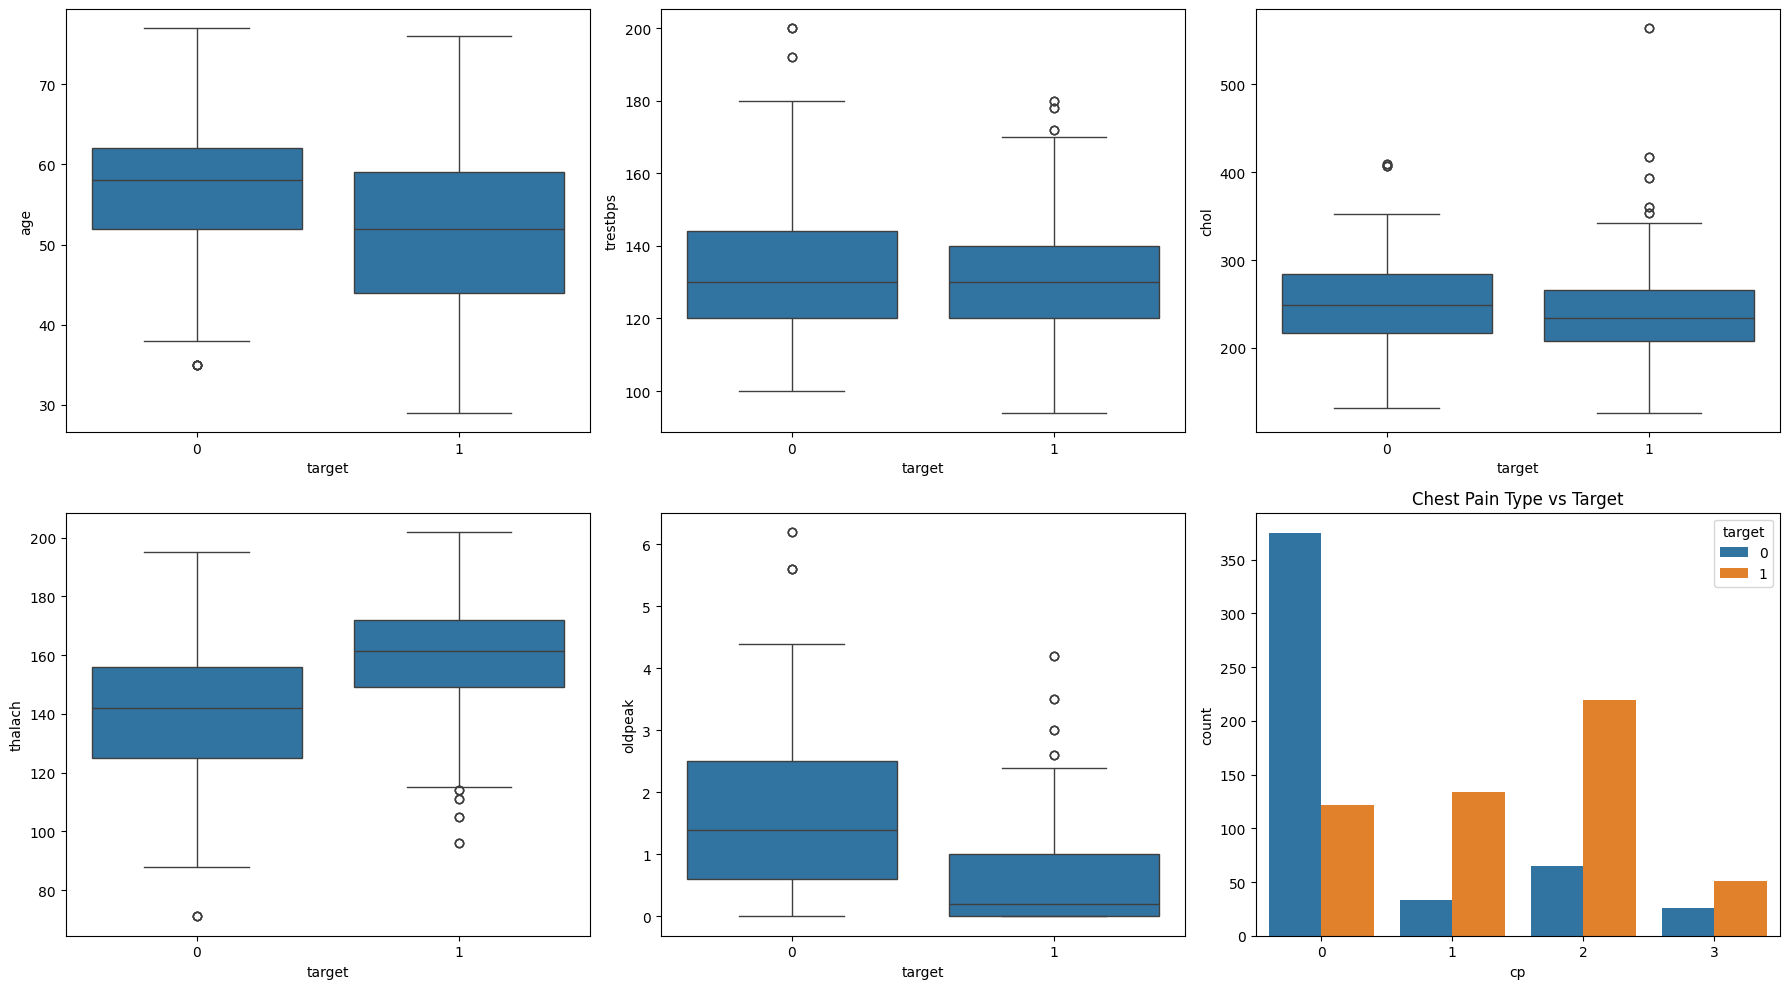

In [9]:

# Visualize selected features against the target
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(data=data, x='target', y='age', ax=axs[0,0])
sns.boxplot(data=data, x='target', y='trestbps', ax=axs[0,1])
sns.boxplot(data=data, x='target', y='chol', ax=axs[0,2])
sns.boxplot(data=data, x='target', y='thalach', ax=axs[1,0])
sns.boxplot(data=data, x='target', y='oldpeak', ax=axs[1,1])
sns.countplot(data=data, x='cp', hue='target', ax=axs[1,2])

axs[1,2].set_title('Chest Pain Type vs Target')

plt.tight_layout()
plt.show()


## 2. Train-Test Split

In [11]:

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Train a Decision Tree Classifier and Visualize the Tree

### Decision Tree Classifier & Visualization

A **Decision Tree Classifier** was trained on the dataset using default parameters. The model learns to split the data based on feature values that best separate the target classes (0 = No Disease, 1 = Disease).

####  Tree Visualization:
- The diagram below represents the **learned decision rules**.
- Each node shows:
  - The **feature** and threshold used to split the data.
  - The **Gini impurity** (a measure of impurity or disorder).
  - The **sample count** at that node.
  - The **class distribution** and predicted class.

####  Interpretation:
- The tree starts at the root and splits based on features such as `cp`, `thal`, and `oldpeak`, which are informative for heart disease prediction.
- The color intensity reflects the **purity of the node** (i.e., how dominant one class is).
- However, the tree may be **overfitting**, as it seems deep and complex.

> In the next steps, we will address overfitting by limiting tree depth and evaluating performance using cross-validation.

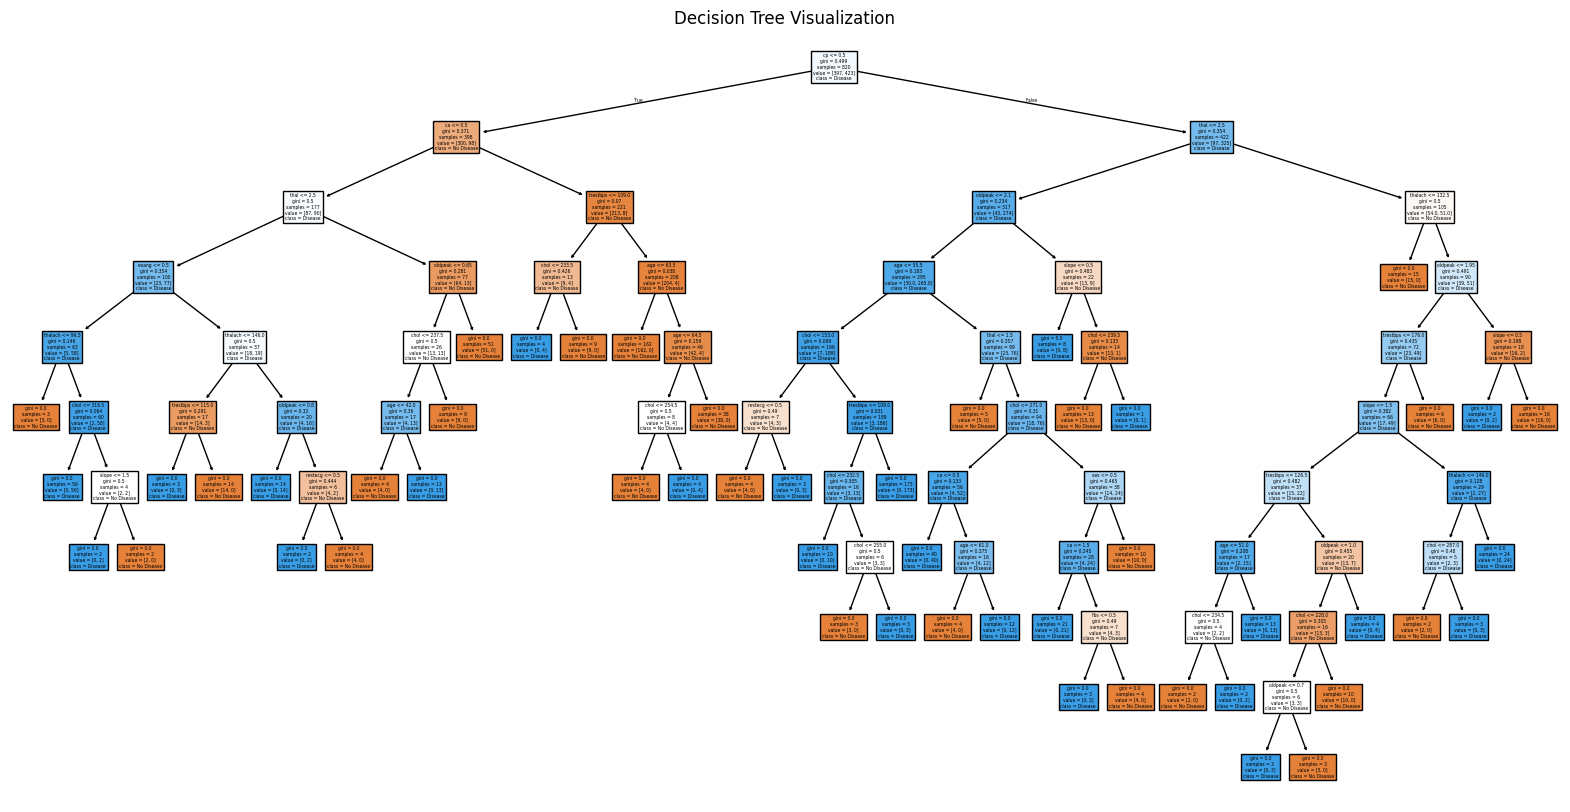

In [ ]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [19]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9853658536585366


## 4. Analyze Overfitting and Control Tree Depth

### Overfitting Analysis with Varying Tree Depth

The plot below shows how model accuracy changes with different values of `max_depth` in a Decision Tree Classifier.

#### Key Observations:
- **Training Accuracy** increases consistently with tree depth, reaching nearly 100% at deeper levels. This indicates the model is memorizing training data (overfitting).
- **Testing Accuracy** initially increases with depth and peaks around **max_depth = 10**, suggesting optimal generalization at that depth.
- After depth 10, the test accuracy plateaus, while the training accuracy remains perfect, highlighting **overfitting beyond this point**.

#### Conclusion:
Choosing an optimal `max_depth` (like 8–10) helps balance **bias and variance**, leading to better performance on unseen data.


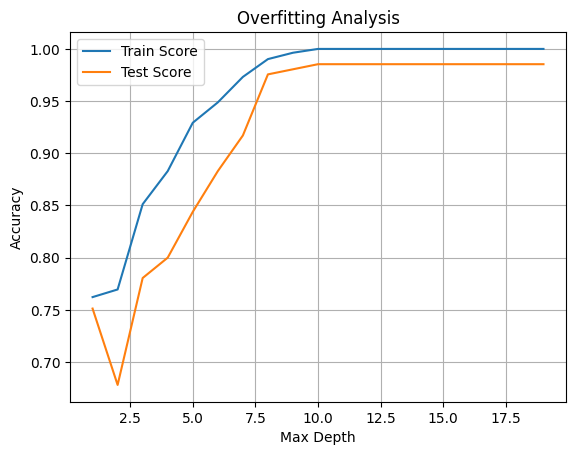

In [13]:

depths = range(1, 20)
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, label="Train Score")
plt.plot(depths, test_scores, label="Test Score")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()


### Feature Importances from Decision Tree

The bar plot above illustrates the relative importance of each feature in predicting heart disease using the Decision Tree classifier. Features like `cp` (chest pain type), `thal`  and `ca`  contribute more significantly to the model’s decision-making process. 

Feature importance in a decision tree is calculated based on the total reduction of the impurity (e.g., Gini index) brought by that feature. This analysis helps in identifying the most relevant clinical factors associated with heart disease, which can be valuable for both model interpretation and feature selection.


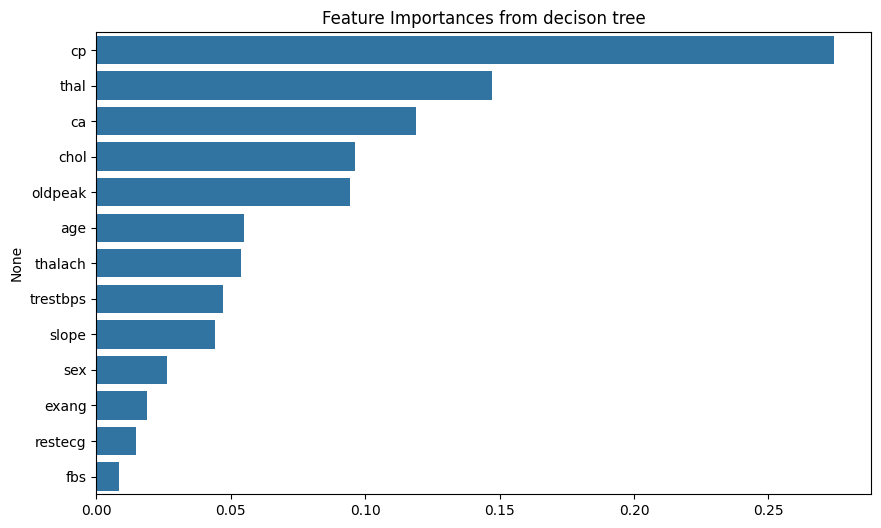

In [24]:

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances from decison tree")
sns.barplot(x=importances[indices], y=features[indices])
plt.show()


## 5. Train a Random Forest and Compare Accuracy

In [14]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## 6. Interpret Feature Importances

### Feature Importance Analysis using Random Forest

The bar plot below illustrates the **relative importance of each feature** in predicting heart disease, as determined by a trained Random Forest model. Feature importance in Random Forest is calculated based on how much each feature contributes to reducing impurity (e.g., Gini or entropy) across all decision trees in the ensemble.

####  Key Observations:

- **Chest Pain Type (`cp`)** is the most influential feature, indicating that it plays a major role in distinguishing between patients with and without heart disease.
- **Number of Major Vessels Colored (`ca`)**, **Maximum Heart Rate Achieved (`thalach`)**, and **ST Depression Induced by Exercise (`oldpeak`)** also show high importance, suggesting strong predictive power.
- Features such as **Fasting Blood Sugar (`fbs`)**, **Resting ECG (`restecg`)**, and **Sex (`sex`)** have lower importance scores, contributing less to the model’s performance.

This analysis is useful in understanding which medical attributes most significantly influence heart disease prediction, potentially guiding feature selection or simplifying models without sacrificing accuracy.


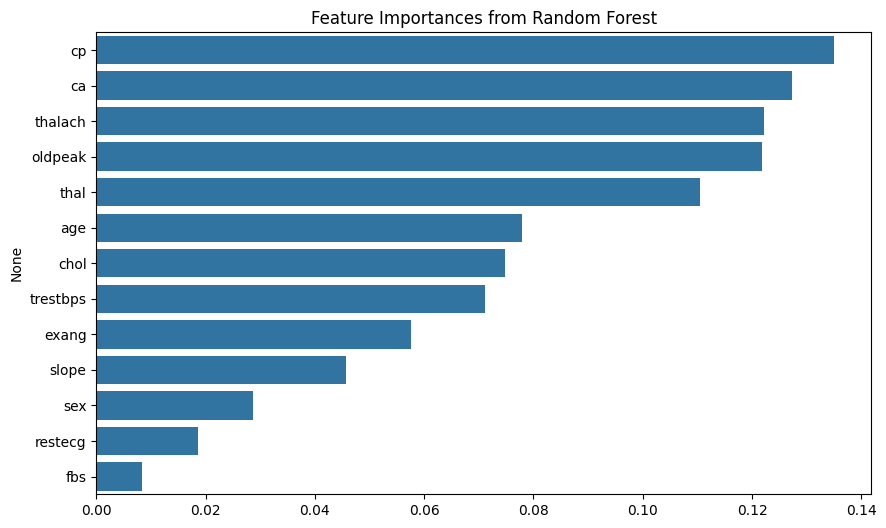

In [15]:

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances from Random Forest")
sns.barplot(x=importances[indices], y=features[indices])
plt.show()


## 7. Evaluate Using Cross-Validation

### Cross-Validation Accuracy Comparison

To evaluate the generalization performance of our models, we performed **5-fold cross-validation** on both the Decision Tree and Random Forest classifiers. The results are as follows:

- **Decision Tree CV Accuracy:** 100.00%
- **Random Forest CV Accuracy:** 99.71%

#### Interpretation:

- The **Decision Tree** model achieved perfect accuracy during cross-validation, which might seem impressive but often indicates **overfitting**—especially since decision trees tend to memorize training data if not properly regularized (e.g., using `max_depth`).
- The **Random Forest** model also performed exceptionally well with a slightly lower CV accuracy (99.71%), but its ensemble nature provides **better robustness and generalization** compared to a single decision tree.

These results suggest that while both models are highly accurate on this dataset, the Random Forest is likely more reliable on unseen data due to its ensemble structure.


In [16]:

dt_cv_scores = cross_val_score(dt, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy: {:.2f}%".format(dt_cv_scores.mean() * 100))
print("Random Forest CV Accuracy: {:.2f}%".format(rf_cv_scores.mean() * 100))


Decision Tree CV Accuracy: 100.00%
Random Forest CV Accuracy: 99.71%
